# Topic 4 데이터 퀄리티 높이기

#### 좋은 데이터의 기준
- 완결성  
    - 필수적인 데이터(아이디, 비밀번호, 이름 등)는 모두 기록되어 있어야 함   
    - 결측값(채워져야 하는데 비어 있는 값)이 없어야 함
- 유일성  
    - 동일한 데이터가 불필요하게 중복되어 있으면 안 됨(이메일, 주민등록번호, 휴대폰 번호 등)  
- 통일성  
    - 데이터가 동일한 형식(데이터 타입, 단위, 포맷 등)으로 저장돼 있어야 함
- 정확성  
    - 데이터가 정확해야 함
    - 이상점(outlier) 처리

### 데이터 클리닝 : 유일성

In [1]:
import pandas as pd

In [11]:
df = pd.read_csv('data/attendance.csv', index_col=0)
df

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,NaN,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,NaN,4537,1150
2013,11373,7656,NaN,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


데이터를 살펴보면 중간에 **NaN(Not a Number)** 라는  **결측값**(채워져야 하는데 비어 있는 값)이 존재한다. 결측값이 있다는 건 데이터의 완결성이 없다는 것이기 때문에 결측값이 없는 것이 좋다. 그래서 조사를 통해 제대로 된 값들로 채워야 한다. 그게 불가능하다면 그냥 결측값으로 두고 데이터 분석 시 결측값이 있다는 것을 고려하는 방법과 결측값 레코드를 지워버리는 방법이 있다. 결측값이 발생하는 행 또는 컬럼을 `dropna()` 함수를 통해 지우는 것이다. 또는 결측값을 '`fillna()` 함수를 이용해 다른 값으로 대체하는 방법도 있다. 하지만 결측값이 자주 발생한다면 원인을 파악해야 한다.  

결측값을 파악하는 방법은 다음과 같다.

In [7]:
df.isnull()  # 결측값 있는 위치만 True 출력, 데이터가 크면 한 눈에 안 들어옴

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,False,False,False,False,False
2009,False,False,False,False,False
2010,False,False,True,False,False
2011,False,False,False,False,False
2012,False,False,True,False,False
2013,False,False,True,False,False
2014,False,False,False,False,False
2015,False,False,False,False,False
2016,False,False,False,False,False


In [8]:
df.isnull().sum()  # 각 컬럼의 결측값 개수를 출력

야구      0
축구      0
배구      3
남자농구    0
여자농구    0
dtype: int64

In [10]:
df.dropna(inplace=True)  # 결측값 존재 행 삭제
df

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2011,13055,10709,1774.0,3955,1445
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425
2017,11668,6502,2425.0,3188,1097


In [12]:
df.dropna(axis='columns')  # 결측값 있는 컬럼 삭제

,야구,축구,남자농구,여자농구
연도,,,,
2008,10881,11642,4208,1329
2009,11562,10983,4152,1206
2010,11402,12873,3870,705
2011,13055,10709,3955,1445
2012,13747,7157,4537,1150
2013,11373,7656,4092,1237
2014,11429,8115,4458,1417
2015,10357,7720,3953,1480
2016,11583,7854,3543,1425


In [13]:
df.fillna(0)  # 결측값 대체, 여기선 0으로 대체

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,0.0,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,0.0,4537,1150
2013,11373,7656,0.0,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


In [14]:
df.mean()

야구      11705.700000
축구       9121.100000
배구       1933.857143
남자농구     3995.600000
여자농구     1249.100000
dtype: float64

In [15]:
df.fillna(df.mean())  # 결측값을 결측값이 존재하는 컬럼의 평균값으로 대체

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.000000,4208,1329
2009,11562,10983,1471.000000,4152,1206
2010,11402,12873,1933.857143,3870,705
2011,13055,10709,1774.000000,3955,1445
2012,13747,7157,1933.857143,4537,1150
2013,11373,7656,1933.857143,4092,1237
2014,11429,8115,1967.000000,4458,1417
2015,10357,7720,2311.000000,3953,1480
2016,11583,7854,2336.000000,3543,1425


In [16]:
df.fillna(df.median())  # 결측값을 결측값이 존재하는 컬럼의 중간값으로 대체

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,1967.0,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,1967.0,4537,1150
2013,11373,7656,1967.0,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


### 데이터 클리닝 : 유일성

row 및 column에서 중복되는 값을 찾아 제거해주면 된다.  

다음은 row가 중복되는 경우다.

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('data/dust.csv', index_col=0)
df.head()

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27,29
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26,18


In [19]:
df.index  # 날짜 row

Index(['08월 11일', '08월 10일', '08월 09일', '08월 08일', '08월 07일', '08월 06일',
       '08월 05일', '08월 04일', '08월 03일', '08월 02일', '08월 01일', '07월 31일',
       '07월 31일', '07월 30일', '07월 29일', '07월 28일', '07월 27일', '07월 26일',
       '07월 25일', '07월 24일', '07월 23일', '07월 22일', '07월 21일', '07월 20일',
       '07월 19일', '07월 18일', '07월 17일', '07월 16일', '07월 15일', '07월 14일',
       '07월 13일'],
      dtype='object', name='날짜')

In [22]:
df.index.value_counts()  # 같은 인덱스의 행 개수, 07월 31일이 두 번 나온다.

07월 31일    2
08월 01일    1
08월 02일    1
07월 21일    1
08월 10일    1
08월 06일    1
08월 04일    1
07월 13일    1
07월 15일    1
07월 14일    1
07월 18일    1
07월 23일    1
07월 19일    1
08월 03일    1
07월 30일    1
07월 22일    1
07월 25일    1
07월 24일    1
07월 27일    1
08월 08일    1
07월 17일    1
07월 28일    1
08월 09일    1
07월 29일    1
07월 26일    1
08월 05일    1
07월 20일    1
08월 07일    1
07월 16일    1
08월 11일    1
Name: 날짜, dtype: int64

In [23]:
df.loc['07월 31일']

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
07월 31일,18,26,17,23,23,17,23,21,19,20,21,21,22,19,22,25,28,19
07월 31일,18,26,17,23,23,17,23,21,19,20,21,21,22,19,22,25,28,19


In [28]:
df.drop_duplicates(inplace=True)  # 중복된 row 삭제
df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27,29
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26,18
08월 06일,31,39,29,35,27,31,31,30,22,33,28,27,30,34,29,37,24,22
08월 05일,27,36,25,31,27,24,30,27,25,31,25,26,25,25,28,31,22,25
08월 04일,27,36,26,31,27,27,32,31,39,36,30,27,27,29,29,36,27,39
08월 03일,44,32,23,47,29,28,29,44,33,31,34,27,28,32,28,31,26,33


다음은 column이 중복되는 경우다.

In [30]:
df.T  # 전치행렬, row와 column이 다름

날짜,08월 11일,08월 10일,08월 09일,08월 08일,08월 07일,08월 06일,08월 05일,08월 04일,08월 03일,08월 02일,...,07월 22일,07월 21일,07월 20일,07월 19일,07월 18일,07월 17일,07월 16일,07월 15일,07월 14일,07월 13일
서울,7,15,24,26,20,31,27,27,44,40,...,30,37,36,30,35,30,26,22,20,21
부산,17,25,26,25,26,39,36,36,32,26,...,28,37,70,76,55,56,48,49,46,43
대구,15,15,26,28,22,29,25,26,23,20,...,20,41,56,54,42,49,42,21,26,29
인천,10,20,27,26,25,35,31,31,47,41,...,30,30,27,29,36,32,24,22,22,19
광주,29,28,27,29,33,27,27,27,29,26,...,21,48,46,36,39,38,37,23,24,23
대전,12,25,27,31,24,31,24,27,28,19,...,40,57,44,40,42,36,30,18,17,19
울산,12,17,22,20,18,31,30,32,29,20,...,26,42,77,81,66,65,59,55,54,47
경기,9,20,27,26,23,30,27,31,44,39,...,34,38,36,32,36,32,28,23,21,21
강원,16,16,25,29,18,22,25,39,33,25,...,44,51,44,40,39,44,36,25,26,24
충북,14,25,32,33,23,33,31,36,31,24,...,48,59,51,47,47,43,38,24,23,24


In [31]:
df.T.drop_duplicates()

날짜,08월 11일,08월 10일,08월 09일,08월 08일,08월 07일,08월 06일,08월 05일,08월 04일,08월 03일,08월 02일,...,07월 22일,07월 21일,07월 20일,07월 19일,07월 18일,07월 17일,07월 16일,07월 15일,07월 14일,07월 13일
서울,7,15,24,26,20,31,27,27,44,40,...,30,37,36,30,35,30,26,22,20,21
부산,17,25,26,25,26,39,36,36,32,26,...,28,37,70,76,55,56,48,49,46,43
대구,15,15,26,28,22,29,25,26,23,20,...,20,41,56,54,42,49,42,21,26,29
인천,10,20,27,26,25,35,31,31,47,41,...,30,30,27,29,36,32,24,22,22,19
광주,29,28,27,29,33,27,27,27,29,26,...,21,48,46,36,39,38,37,23,24,23
대전,12,25,27,31,24,31,24,27,28,19,...,40,57,44,40,42,36,30,18,17,19
울산,12,17,22,20,18,31,30,32,29,20,...,26,42,77,81,66,65,59,55,54,47
경기,9,20,27,26,23,30,27,31,44,39,...,34,38,36,32,36,32,28,23,21,21
강원,16,16,25,29,18,22,25,39,33,25,...,44,51,44,40,39,44,36,25,26,24
충북,14,25,32,33,23,33,31,36,31,24,...,48,59,51,47,47,43,38,24,23,24


`강원`과 `강원.1`의 이름은 다르지만, 내용이 같아 같은 row로 판단하고 삭제했다. 만약 이름은 같지만 내용이 다르다면, 해당 row는 지워지지 않는다.

In [32]:
df = df.T.drop_duplicates().T  # 이번에는 inplace 옵션을 사용하지 못해 df에 다시 저장해줘야 한다.

In [34]:
df.head()

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주
날짜,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26


### 데이터 클리닝 : 정확성

이상점(Outlier)은 다른 값들과 너무 동떨어져 있는 데이터다. 이상점을 판단하는 절대적인 기준은 없다. 이상점을 판단하는 방법 중 하나는 다음과 같다.  

Box Plot에서 25% ~ 75% 지점을 **IQR** (Interquartile Range)이라고 하는데, 25% 지점에서 1.5 * IQR 지점을 넘거나 75% 지점에서 1.5 * IQR을 넘으면 이상점이라고 판단한다. 이 방법도 절대적인 기준은 아니다.  

이상점이라고 판단된 데이터 중 잘못된 데이터일 때는 고치거나 제거한다. 제대로 된 데이터라면 분석에 방해가 되면 제거하고, 의미 있는 정보라면 그냥 둔다. 이럴 경우에는 상황에 맞게 판단해야 한다.

In [1]:
%matplotlib inline
import pandas as pd

In [23]:
df = pd.read_csv('data/beer.csv', index_col=0)
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0


<AxesSubplot:>

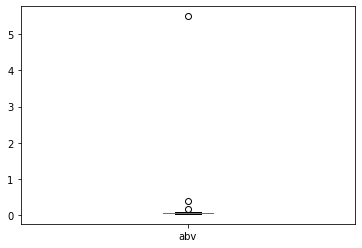

In [3]:
df.plot(kind='box', y='abv')  # 이상점 3개

In [5]:
df['abv'].describe()  # 25%, 75% 지점 확인

count    2190.000000
mean        0.060186
std         0.117010
min         0.032000
25%         0.050000
50%         0.055000
75%         0.065000
max         5.500000
Name: abv, dtype: float64

In [6]:
df['abv'].quantile(0.25)  # 25% 지점

0.05

In [7]:
df['abv'].quantile(0.75)  # 75% 지점

0.065

In [9]:
q1 = df['abv'].quantile(0.25)
q3 = df['abv'].quantile(0.75)
iqr = q3 - q1  # IQR

In [11]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)  # 이상점 존재 조건

In [12]:
df[condition]  # 이상점(소주, 보드카는 종류 자체가 잘못됨, 맥주는 도수가 0.055로 들어가야 함)

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.00


In [24]:
df.loc[2250, 'abv'] = 0.055

In [25]:
df.loc[2250]

abv                             0.055
ibu                                40
id                                145
name              Silverback Pale Ale
style         American Pale Ale (APA)
brewery_id                        424
ounces                             12
Name: 2250, dtype: object

In [26]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)  # 이상점 존재 조건
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26


In [27]:
df[condition].index

Int64Index([963, 1856], dtype='int64')

In [28]:
df.drop(df[condition].index, inplace=True)  # 소주, 보드카 인덱스 삭제

In [29]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)  # 이상점 존재 조건
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces


<AxesSubplot:>

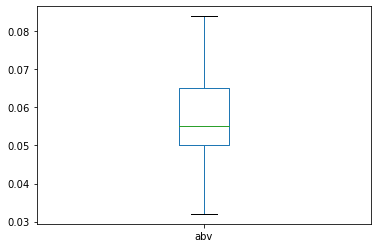

In [30]:
df.plot(kind='box', y='abv')  # 이상점 없음

`키 188cm`는 존재 가능하다. `몸무게 42kg`도 존재 가능하다. 하지만 `키 188cn & 몸무게 42kg`는 키와 몸무게의 관계를 생각해봤을 때 꽤나 비정상적인 데이터다. 이처럼 두 변수의 관계를 고려했을 때 이상한 데이터를 **관계적 이상점** (Relational Outlier)이라고 한다.

In [31]:
%matplotlib inline
import pandas as pd

In [32]:
df = pd.read_csv('data/exam_outlier.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:xlabel='reading score', ylabel='writing score'>

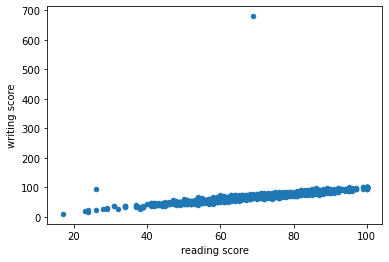

In [33]:
df.plot(kind='scatter', x='reading score', y='writing score')  # 쓰기 점수와 읽기 점수의 상관 관계
# 쓰기 점수가 거의 700점인 데이터가 이상점

In [34]:
df.corr()  # 상관 계수, 읽기 점수와 쓰기 점수의 상관 계수가 0.58 정도로 작게 나옴. 이상점이 영향을 끼침

,math score,reading score,writing score
math score,1.000000,0.810412,0.513623
reading score,0.810412,1.000000,0.582378
writing score,0.513623,0.582378,1.000000


In [37]:
df[df['writing score'] > 100]  # 쓰기 점수 100점 초과인 인덱스

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
51,male,group E,associate's degree,free/reduced,completed,77,69,680


In [38]:
df.drop(51, inplace=True)

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

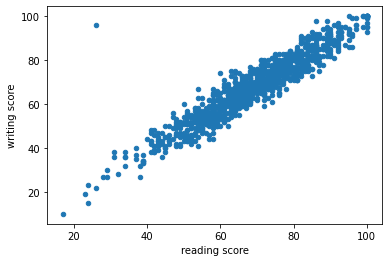

In [39]:
df.plot(kind='scatter', x='reading score', y='writing score')  # 훨씬 나아졌지만, 동떨어진 데이터가 존재

In [40]:
df.corr()  # 상관 계수가 0.94로 높아짐

,math score,reading score,writing score
math score,1.000000,0.810627,0.802853
reading score,0.810627,1.000000,0.943248
writing score,0.802853,0.943248,1.000000


In [43]:
condition = (df['writing score'] > 90) & (df['reading score'] < 40)
df[condition]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
373,female,group D,some college,standard,completed,82,26,96


In [44]:
df.drop(373, inplace=True)  # 쓰기 점수는 높지만, 그거에 비해 읽기 점수가 낮은 인덱스 삭제

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

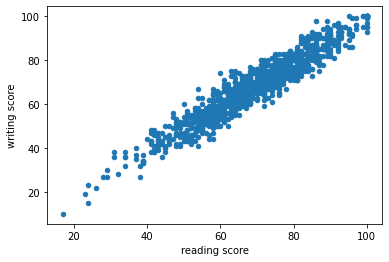

In [45]:
df.plot(kind='scatter', x='reading score', y='writing score')  # 이상점 제거

In [46]:
df.corr()  # 상관계수 더 높아짐

,math score,reading score,writing score
math score,1.000000,0.817735,0.802722
reading score,0.817735,1.000000,0.954440
writing score,0.802722,0.954440,1.000000


<br><br>
### 실습 문제 - 영화 평점 분석하기 Ⅰ

예산을 기준으로 75% 지점에서 5 IQR 만큼 더한 것보다 큰 예산의 영화는 제거하고, 산점도를 그려보세요.

<AxesSubplot:xlabel='budget', ylabel='imdb_score'>

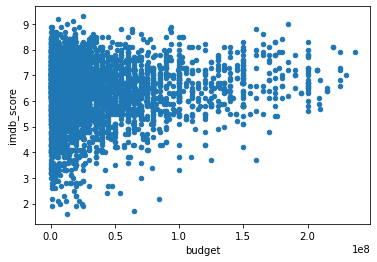

In [48]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/movie_metadata.csv')

q1 = df['budget'].quantile(0.25)
q3 = df['budget'].quantile(0.75)
iqr = q3 - q1

condition = (df['budget'] > q3 + 5 * iqr)
df.drop(df[condition].index, inplace=True)

df.plot(kind='scatter', x='budget', y='imdb_score')

<br><br>
### 실습 문제 - 영화 평점 분석하기 Ⅱ

movie_metadata.csv에서 예산이 가장 높은 15개 영화를 제거하고, 산점도를 그려보세요.

<AxesSubplot:xlabel='budget', ylabel='imdb_score'>

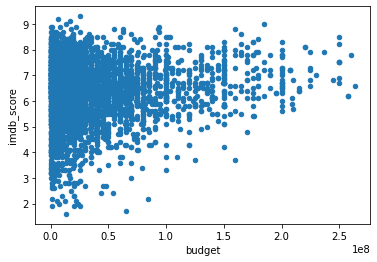

In [49]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/movie_metadata.csv')

index = df['budget'].sort_values(ascending=False)[:15].index
df.drop(index, inplace=True)

df.plot(kind='scatter', x='budget', y='imdb_score')